# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Master LangGraph with Ollama - Agentic Chatbot and RAG**](https://www.udemy.com/course/langgraph-with-ollama/?referralCode=B646DCB44A189BEBC20C) | Master LangGraph, Ollama, and Agentic RAG. Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Master Langchain and Ollama - Chatbot, RAG and Agents**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


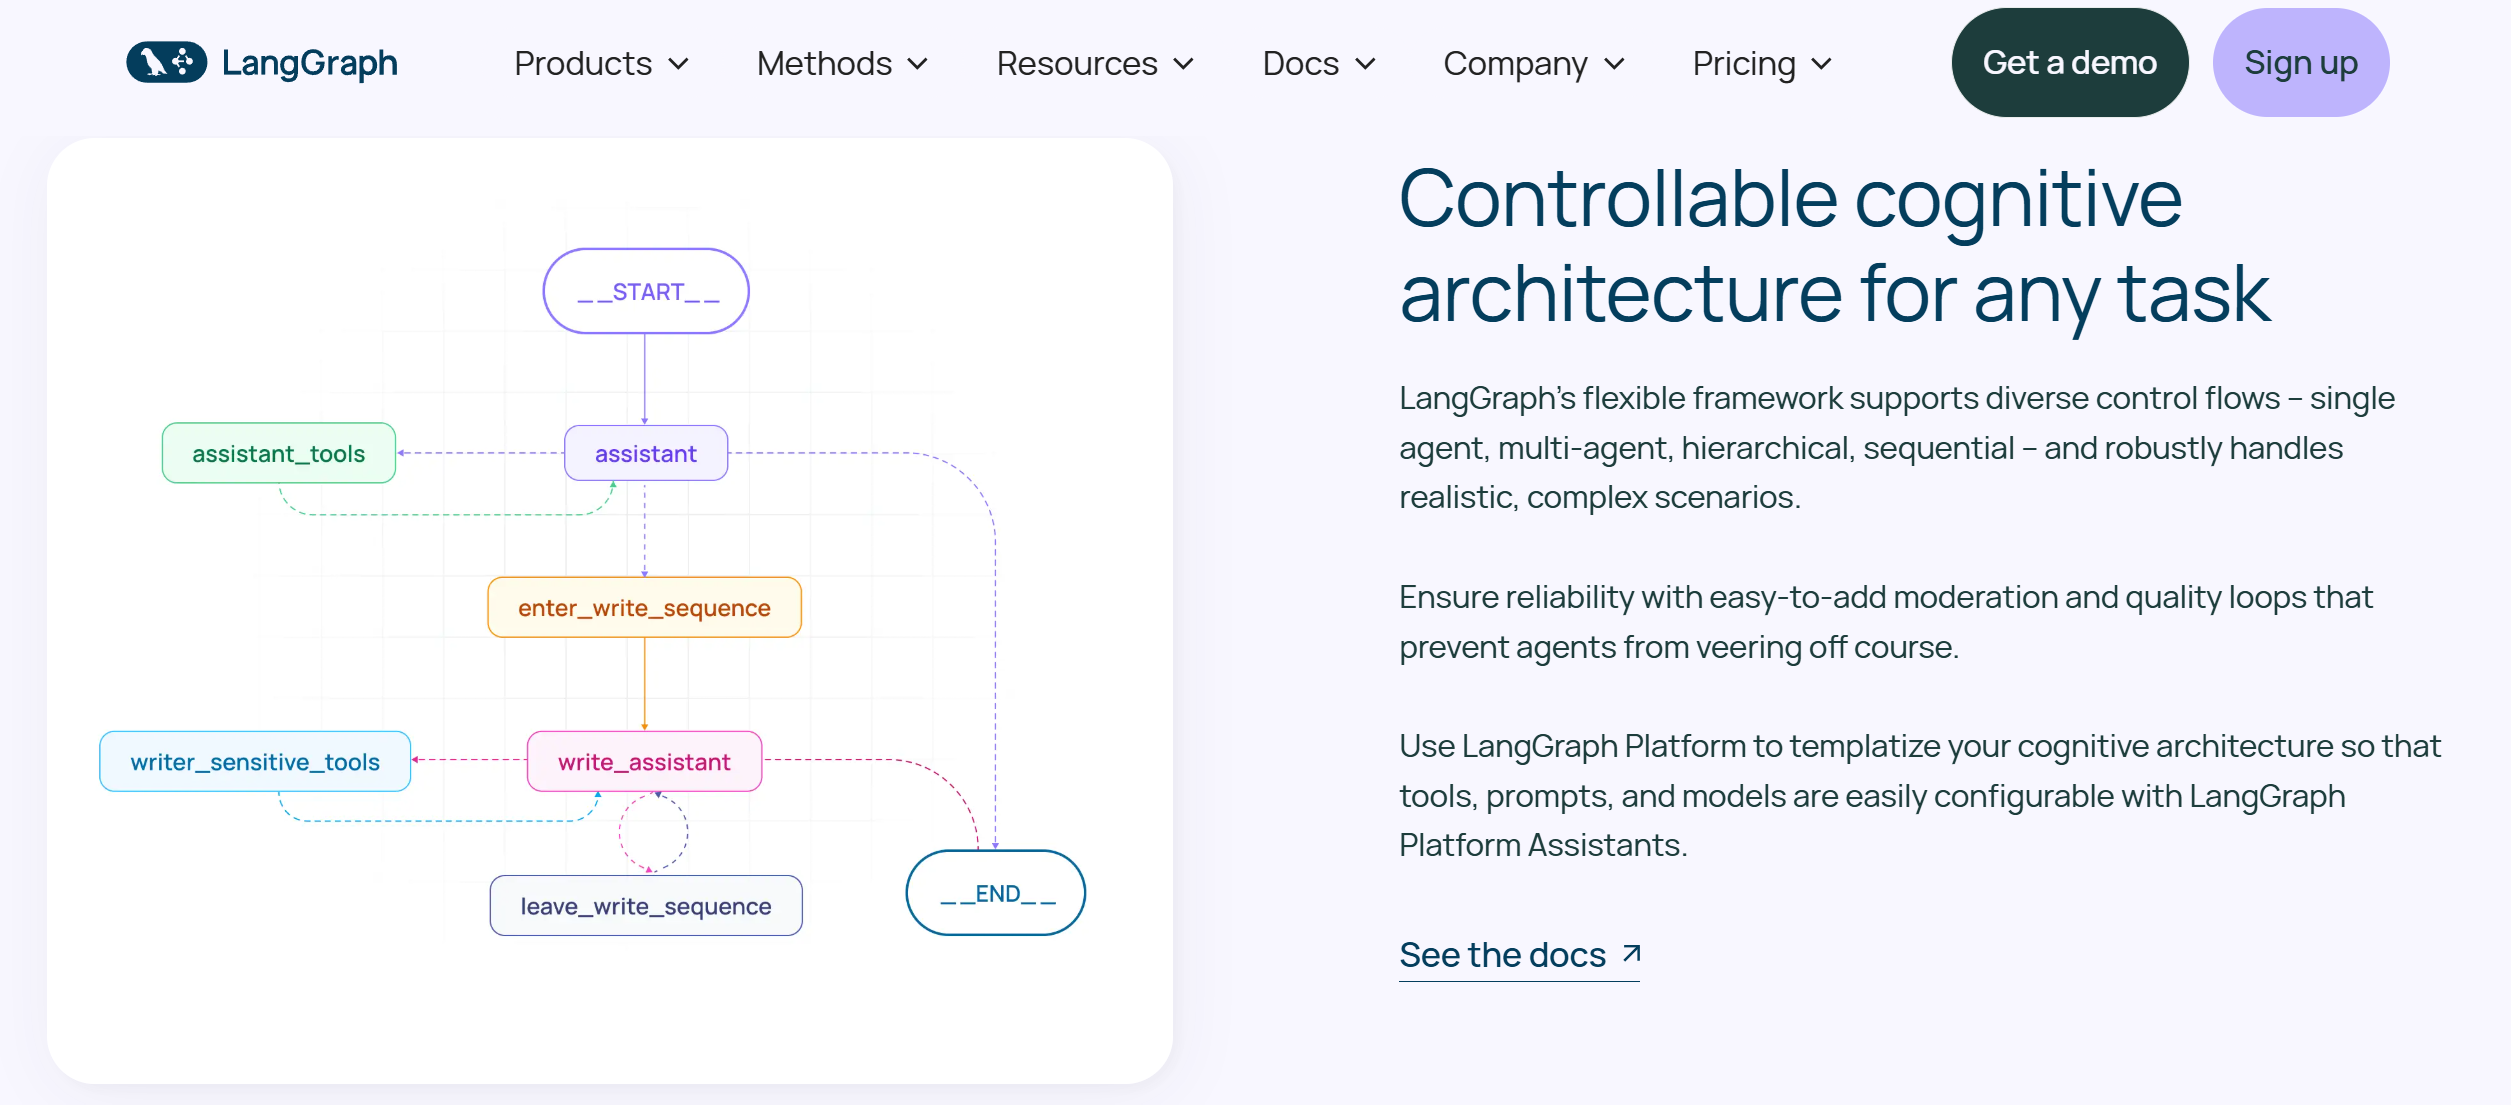

https://www.langchain.com/langgraph

https://github.com/langchain-ai/langgraph

In [ ]:
#!pip install -U langgraph

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('../.env')

True

In [8]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

In [9]:
llm.invoke("Hi")

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-24T07:19:23.3340367Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 5916377400, 'load_duration': 4921531000, 'prompt_eval_count': 26, 'prompt_eval_duration': 158098000, 'eval_count': 8, 'eval_duration': 826382000}, id='run-20effb5c-ef92-4411-b6fb-0cd63edc4423-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [ ]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


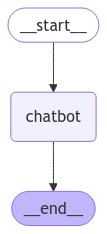

In [13]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
graph.invoke({"messages": ["Hi", "myself is laxmi kant"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='ed7cacf3-f155-4942-9267-ab1c11d8cba3'),
  HumanMessage(content='myself is laxmi kant', additional_kwargs={}, response_metadata={}, id='937e1dd1-0a75-4a4c-af83-9c80cefc5de8'),
  AIMessage(content="Namaste Laxmi Kant! It's nice to meet you. I'm here to help and chat with you. How can I assist you today? Is there something on your mind that you'd like to talk about or ask for help with?", additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-24T07:34:15.1028287Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4222984700, 'load_duration': 30942100, 'prompt_eval_count': 34, 'prompt_eval_duration': 451712000, 'eval_count': 51, 'eval_duration': 3734563000}, id='run-4d3d70f2-cd58-4fa6-ac06-43a61b74de18-0', usage_metadata={'input_tokens': 34, 'output_tokens': 51, 'total_tokens': 85})]}

In [15]:
graph.invoke({"messages": ["Hello"]})


{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='8a3aab9f-59c0-47ac-8913-03b962f09760'),
  AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-24T07:33:56.2274265Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1159490100, 'load_duration': 27337100, 'prompt_eval_count': 26, 'prompt_eval_duration': 84045000, 'eval_count': 8, 'eval_duration': 1044772000}, id='run-d7d947a6-9ee8-4ca0-abaf-cf885c716440-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})]}

In [19]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")
        break

    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: Hello! How can I assist you today?
Assistant: Here are three simple facts about Earth:

1. Earth is the third planet from the Sun.
2. It takes Earth one year to complete one orbit around the Sun.
3. Earth has 71% of its surface covered in water, which is why it's often called the "water planet".
Bye!
